# Machine Learning & Data Mining Task 1A

## Libraries and Dataset Importation

* The dataset used for this experiment was gotten from the UCL Database 
[Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
# importing the dataset into a DataFrame
online_shopper_DF = pd.read_csv("online_shoppers_intention.csv")

## Data Exploration and Preparation

In [3]:
# checking the top rows of the dataframe
online_shopper_DF.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# checking the last 5 rows
online_shopper_DF.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [5]:
# getting a summary of the DataFrame
online_shopper_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Getting the statistical description of the data for all columns
online_shopper_DF.describe(include="all")

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


In [7]:
# checking the total number of null rows for each column
online_shopper_DF.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
# Size of the dataset
online_shopper_DF.shape

(12330, 18)

In [9]:
# List of all the columns
online_shopper_DF.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [10]:
# Converting the target column to numerical values
online_shopper_DF["Revenue"] = online_shopper_DF['Revenue'].replace(['False', 'True'], [0, 1]).astype(int)

In [11]:
# it is an unbalanced dataset
online_shopper_DF["Revenue"].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

## Correlation Analysis

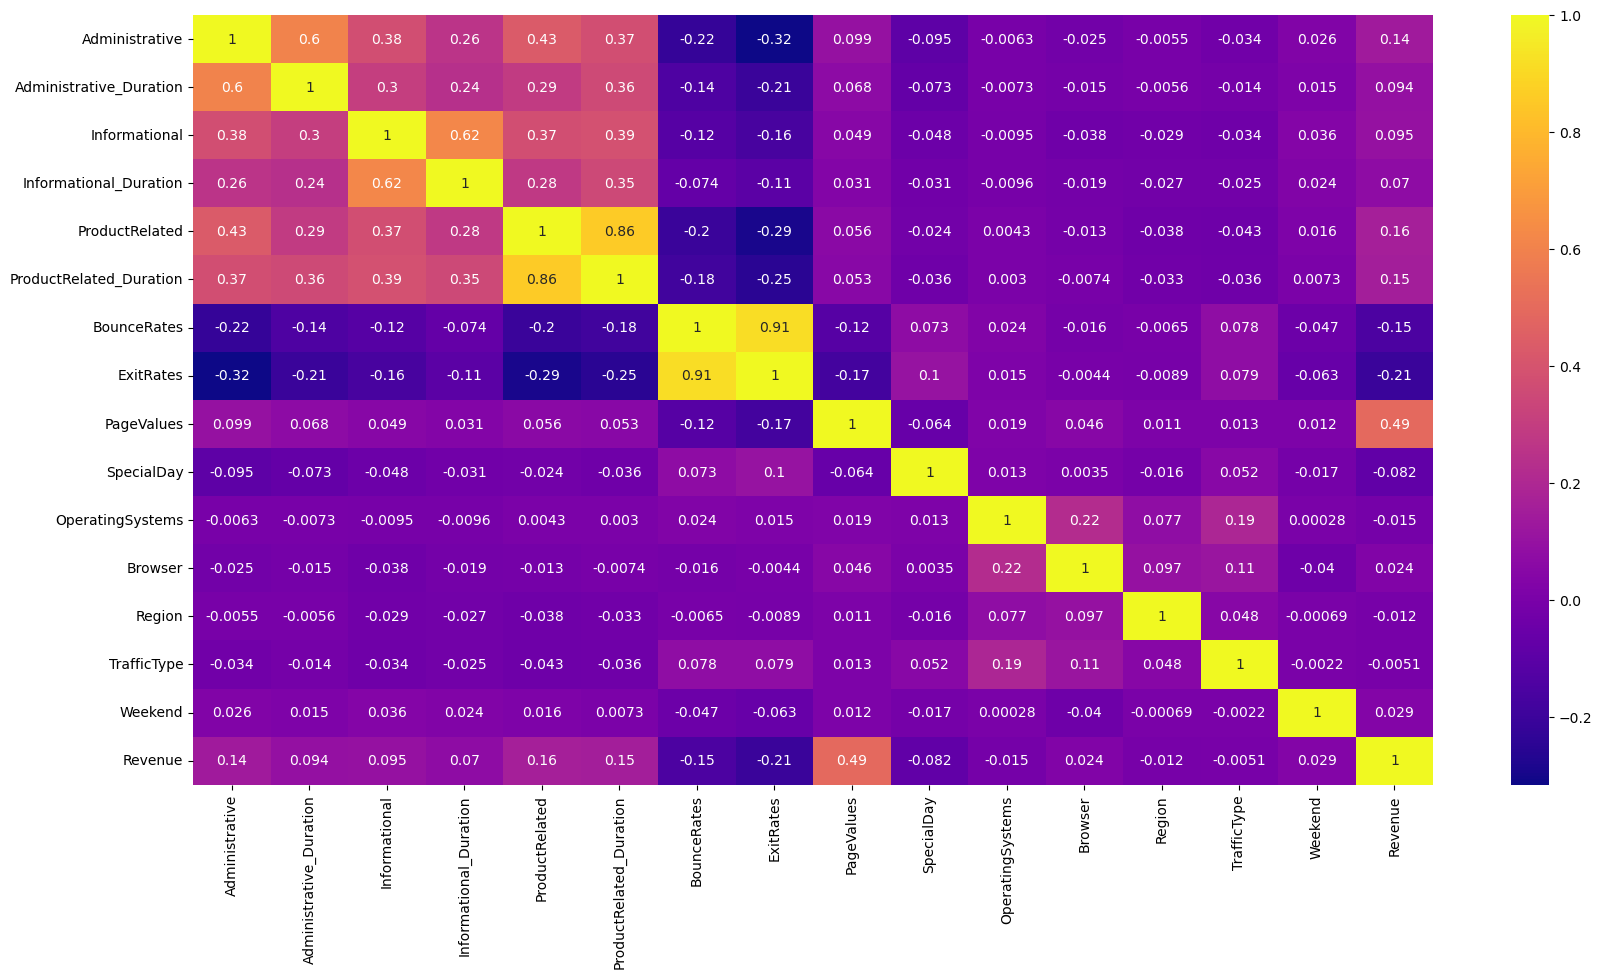

In [12]:
# checking the correlation between the numerical columns and the target column
fig = plt.figure(figsize=[20,10])
sns.heatmap(online_shopper_DF.corr(), cmap='plasma', annot=True)
plt.show();

In [13]:
# Drop a column
# online_shopper_DF = online_shopper_DF.drop('TrafficType', axis=1)

In [14]:
# checking the skewness of our data
online_shopper_DF.skew(numeric_only=True)

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

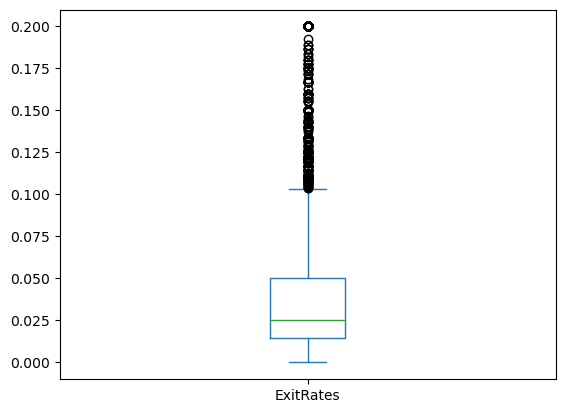

In [15]:
# checking the distribution of 'ExitRates feature'
# plt.figure(figsize=[20,10]
online_shopper_DF['ExitRates'].plot.box();

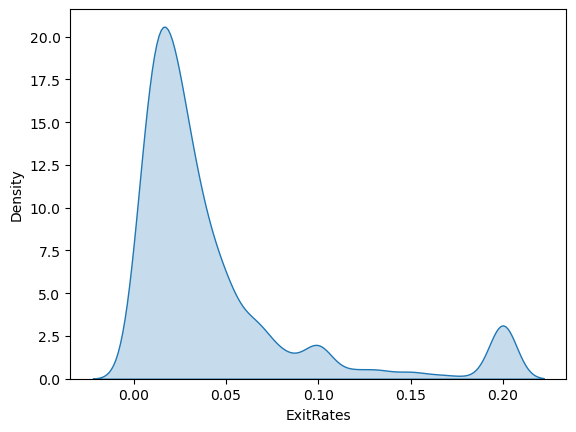

In [16]:
sns.kdeplot(data=online_shopper_DF['ExitRates'], shade=True)
plt.show()

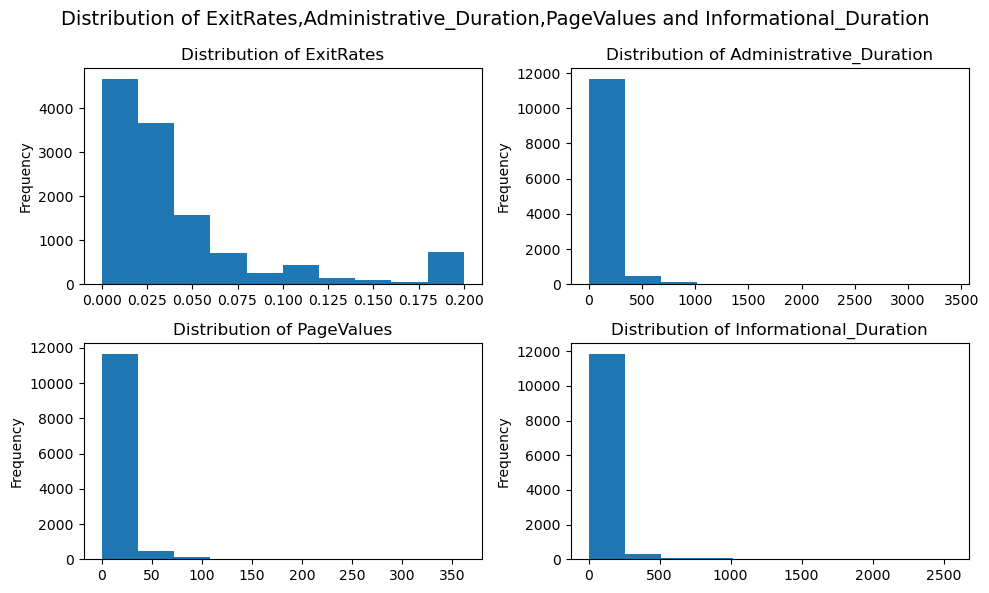

In [17]:
# Distribution of the features ExitRates,Administrative_Duration,PageValues and Informational_Duration
paper, axes = plt.subplots(2, 2, figsize=(10, 6))
online_shopper_DF['ExitRates'].plot(kind='hist', ax=axes[0,0], title='Distribution of ExitRates')
online_shopper_DF['Administrative_Duration'].plot(kind='hist', ax=axes[0,1], title='Distribution of Administrative_Duration')
online_shopper_DF['PageValues'].plot(kind='hist', ax=axes[1,0], title='Distribution of PageValues')
online_shopper_DF['Informational_Duration'].plot(kind='hist', ax=axes[1,1], title='Distribution of Informational_Duration')
plt.suptitle('Distribution of ExitRates,Administrative_Duration,PageValues and Informational_Duration',size=14)
plt.tight_layout()
plt.show()

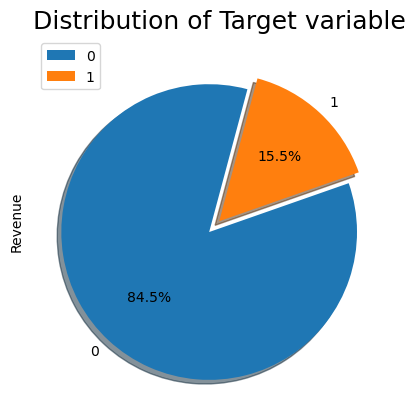

In [18]:
# target variable
online_shopper_DF['Revenue'].value_counts().plot.pie(explode=[0.1,0],autopct='%3.1f%%'
                                     ,shadow=True, legend= True,startangle =75)
plt.title('Distribution of Target variable',size=18)
plt.show()

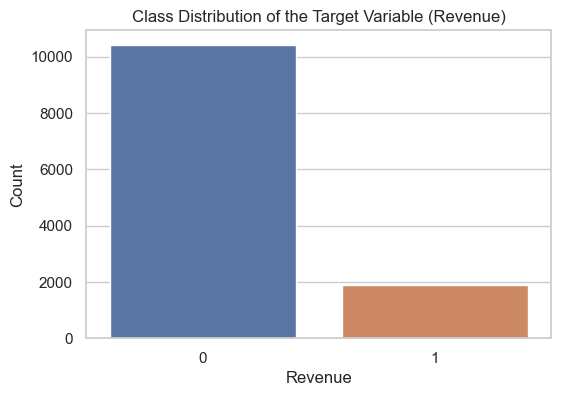

In [19]:
# using seaborn countplot to visualise the imbalance in the target class variable
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Plotting the count plot
sns.countplot(x='Revenue', data=online_shopper_DF)

plt.title('Class Distribution of the Target Variable (Revenue)')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.show()

## Model Design and Implementation

In [20]:
#Splitting data into X and y
# features
X = online_shopper_DF.drop("Revenue", axis=1)

# class variable
y = online_shopper_DF["Revenue"]

In [21]:
# Step 3: Use StratifiedShuffleSplit for splitting
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified_splitter.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

In [22]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Step 4: Create a column transformer for preprocessing
# Assuming 'VisitorType' and 'Month' are categorical variables
# 'Revenue' is dropped from X because it's the target variable
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), ['VisitorType', 'Month', 'Weekend'])
    ])

In [24]:
#Create pipelines for different classifiers
classifiers = {
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42)
    },
    'XGB': {
        'model': XGBClassifier(random_state=42)
    }
}

In [26]:
# Function to evaluate the model
def EvaluateModel(X_test, y_test, y_pred, model_name, hyper):
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    print(f"{model_name}: Accuracy - {accuracy:.4f}")
    
    # Update results DataFrame
    results_df_update = pd.DataFrame({
        'Classifier': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC_Score': auc,
        'Hyperparameters': hyper
    }, index=[0])
    return results_df_update, accuracy

In [34]:
# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 
                                   'AUC_Score', 'Hyperparameters'])

# Step 6 and 7: Train the model and Evaluate
for model_name, config in classifiers.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),  # Add SMOTE to the pipeline
        ('classifier', config['model'])
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    results_df_update, accuracy = EvaluateModel(X_test, y_test, y_pred, model_name, 'NO')
    # Evaluate the model and update results DataFrame
    #results_df = results_df.append(EvaluateModel(X_test, y_test, y_pred, model_name), ignore_index=True)
    results_df = pd.concat([results_df, results_df_update], ignore_index=True)

DecisionTree: Accuracy - 0.8500
XGB: Accuracy - 0.8877


In [28]:
# Print the evaluation metric result DataFrame
results_df.head()

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC_Score,Hyperparameters
0,DecisionTree,0.849959,0.512712,0.633508,0.566745,0.761572,NO
1,XGB,0.887672,0.637795,0.636126,0.636959,0.784953,NO


## Hyperparameters Tunning

In [29]:
#Create pipelines for different classifiers with hyperparameters
classifiers = {
     'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {'classifier__criterion': ['gini', 'entropy'], 'classifier__max_depth': [None, 10, 20]}
    },
    'XGB': {
        'model': XGBClassifier(random_state=42),
        'params': {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20]}
    }
}

In [30]:
# Step 6: Train and evaluate each model
best_model = None
best_accuracy = 0

for model_name, config in classifiers.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),  # Add SMOTE to the pipeline
        ('classifier', config['model'])
    ])
    
    # Get the resampled data using SMOTE
  #  X_train_resampled, y_train_resampled = pipeline.named_steps['smote'].fit_resample(X_train, y_train)
    
    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(pipeline, config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Evaluate the model
    y_pred = grid_search.predict(X_test)
    
    results_hyper_df, accuracy = EvaluateModel(X_test, y_test, y_pred, model_name, 'YES')
    
    # Evaluate the model and update results DataFrame
    #results_df = results_df.append(EvaluateModel(X_test, y_test, y_pred, model_name), ignore_index=True)
    results_df = pd.concat([results_df, results_hyper_df], ignore_index=True)
    
    # Classification report
    report = classification_report(y_test, y_pred)
       
    # Update best model if needed
    if accuracy > best_accuracy:
        best_model = grid_search.best_estimator_
        best_accuracy = accuracy
        y_preds_best_model = y_pred  # Save predictions of the best model

DecisionTree: Accuracy - 0.8646
XGB: Accuracy - 0.8885


In [37]:
# the best model's accuracy
print(f"\nBest Model: {best_model.named_steps['classifier']}\nBest Accuracy: {best_accuracy:.4f}")


Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Best Accuracy: 0.8885


In [31]:
results_df

,Classifier,Accuracy,Precision,Recall,F1-Score,AUC_Score,Hyperparameters
0,DecisionTree,0.849959,0.512712,0.633508,0.566745,0.761572,NO
1,XGB,0.887672,0.637795,0.636126,0.636959,0.784953,NO
2,DecisionTree,0.864558,0.548193,0.714660,0.620455,0.803347,YES
3,XGB,0.888483,0.642667,0.630890,0.636724,0.783295,YES


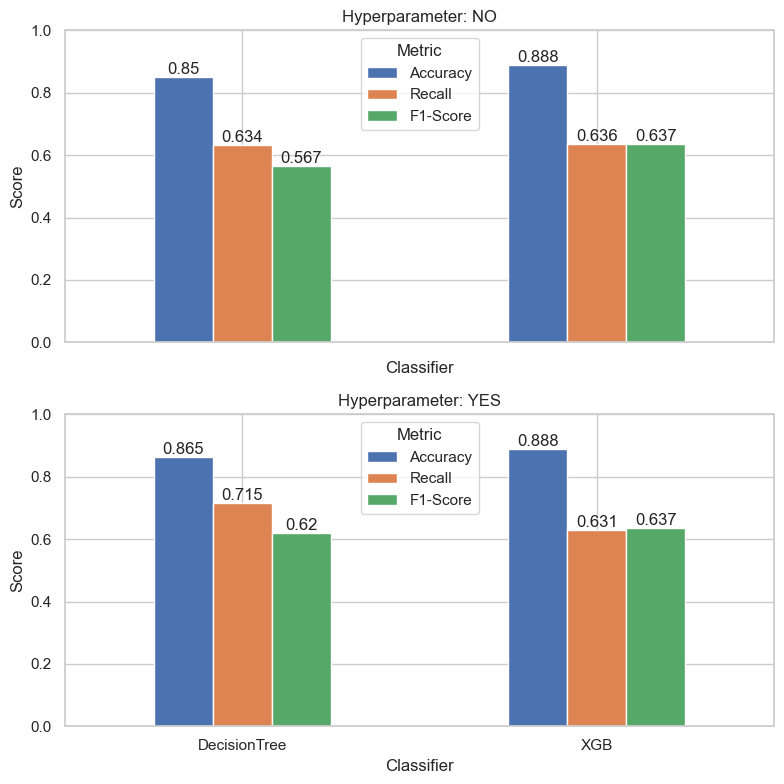

In [32]:
# Group by hyperparameter
grouped_df = results_df.groupby('Hyperparameters')

# Plotting
fig, axes = plt.subplots(nrows=len(grouped_df), ncols=1, figsize=(8, 4 * len(grouped_df)))

for i, ((name, group), ax) in enumerate(zip(grouped_df, axes.flatten())):
    bars = group.plot(kind='bar', x='Classifier', y=['Accuracy', 'Recall', 'F1-Score'], ax=ax, legend=True)

    # Display values on the bars
    for bar in bars.patches:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

    ax.set_title(f'Hyperparameter: {name}')
    ax.set_ylim(0, 1)
    ax.set_ylabel('Score')
    ax.legend(title='Metric', loc='upper center')
    
    if i == 0:  # For the first plot
        ax.set_xticklabels([])  # Remove x-axis labels
    plt.xticks(rotation=0)  # Rotate x-axis labels to be horizontal
    
plt.tight_layout()
plt.show()


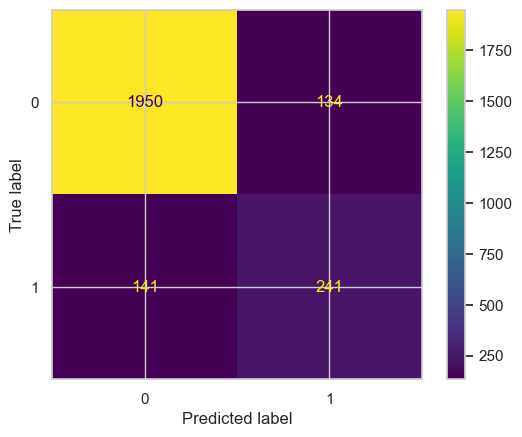

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

# Print confusion matrix
# confusion metrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds_best_model);
# print(f"\nConfusion Matrix for {model_name}:\n{conf_matrix}")

In [36]:
# Classification report
print(report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2084
           1       0.64      0.63      0.64       382

    accuracy                           0.89      2466
   macro avg       0.79      0.78      0.79      2466
weighted avg       0.89      0.89      0.89      2466

